In [2]:
folders = [Path("/misc/lmbraid19/hoffmaja/clean/baseline_scratch/cifar100/data/")]

pretrained_folders = [Path("/misc/lmbraid19/hoffmaja/clean/baseline_train/cifar100/iid/data/baseline_train_iid000003/baseline_train_iid000003/"),
                      Path("/misc/lmbraid19/hoffmaja/clean/baseline_train/cifar100/aug/data/baseline_train_aug000003/baseline_train_aug000003/")]

In [3]:
def read_prune_csv(path, *paths):
    if len(paths):
        return pd.concat([read_prune_csv(p) for p in [path, *paths]], sort=False)

    path = Path(path)

    df = pd.read_csv(path / "metrics.csv").iloc[-1: ]  # Only test

    cfg = OmegaConf.load(path / "configs.yaml")
    df["clean Error"] = 1 - df["test_acc_clean"]
    df["method"] = cfg.prune.method
    df["ratio"] = cfg.prune.ratio
    df["Loss Function"] = cfg.loss["_target_"].split(".")[-1]
    df["pretrained"] = cfg.path.model.split("/")[-2]

    return df

In [4]:
paths = [p for f in folders for p in f.glob("*/*0*/")]

In [5]:
df = read_prune_csv(*paths)
df = df.sort_values(by=["method", "Loss Function", "ratio"])

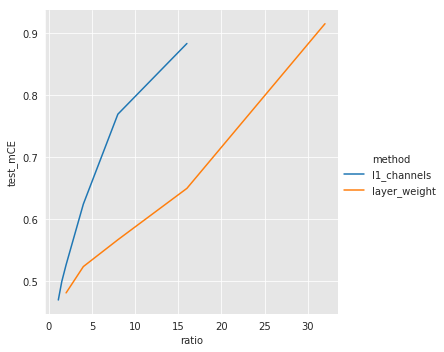

In [7]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g = sns.relplot(data=df, x="ratio", y="test_mCE", hue="method", kind="line")

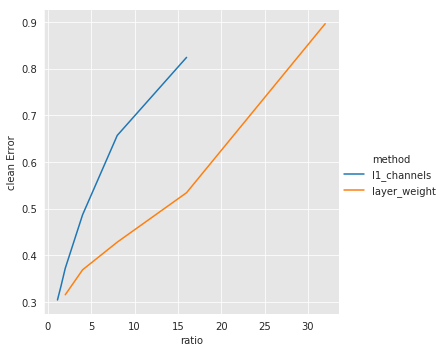

In [8]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g = sns.relplot(data=df, x="ratio", y="clean Error", hue="method", kind="line")